# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"


#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")
        

Processing record 1|hilo
Processing record 2|ginir
Processing record 3|medea
Processing record 4|sao miguel do araguaia
Processing record 5|thompson
Processing record 6|cape town
Processing record 7|sao joao da barra
City not found. skipping.
Processing record 8|koungou
Processing record 9|sao filipe
Processing record 10|kutum
Processing record 11|pevek
Processing record 12|hasaki
Processing record 13|abalak
Processing record 14|bengkulu
Processing record 15|port elizabeth
Processing record 16|quixere
Processing record 17|hermanus
Processing record 18|omsukchan
Processing record 19|lebu
City not found. skipping.
Processing record 20|mataura
Processing record 21|berezovyy
Processing record 22|kindu
Processing record 23|half moon bay
Processing record 24|nanortalik
City not found. skipping.
Processing record 25|yumen
Processing record 26|vaini
Processing record 27|denpasar
Processing record 28|east london
Processing record 29|rikitea
Processing record 30|alta floresta
Processing record 3

Processing record 252|gerash
Processing record 253|kahului
City not found. skipping.
Processing record 254|bathsheba
Processing record 255|port blair
Processing record 256|ajdabiya
City not found. skipping.
Processing record 257|itarema
Processing record 258|san cristobal
Processing record 259|santo antonio do ica
Processing record 260|luderitz
Processing record 261|great yarmouth
Processing record 262|ossora
Processing record 263|koroni
Processing record 264|namtsy
Processing record 265|nemuro
Processing record 266|coruripe
Processing record 267|butembo
Processing record 268|linxia
Processing record 269|palmer
Processing record 270|muros
Processing record 271|winslow
Processing record 272|tailai
Processing record 273|shipunovo
Processing record 274|udgir
Processing record 275|beisfjord
Processing record 276|severo-kurilsk
City not found. skipping.
Processing record 277|muli
Processing record 278|mar del plata
Processing record 279|shaunavon
City not found. skipping.
Processing record 

Processing record 504|marathon
Processing record 505|sandwick
Processing record 506|labelle
Processing record 507|entre rios
Processing record 508|great bend
Processing record 509|puteyets
City not found. skipping.
Processing record 510|maun
Processing record 511|bognor regis
Processing record 512|marawi
Processing record 513|xiongyue
Processing record 514|teahupoo
Processing record 515|barnstaple
City not found. skipping.
Processing record 516|kualakapuas
City not found. skipping.
Processing record 517|omboue
Processing record 518|nuevo progreso
City not found. skipping.
Processing record 519|antofagasta
City not found. skipping.
Processing record 520|saint-augustin
Processing record 521|manaure
Processing record 522|hun
Processing record 523|bumba
Processing record 524|erenhot
Processing record 525|sobolevo
Processing record 526|ambovombe
Processing record 527|grand gaube
Processing record 528|yatou
Processing record 529|kashi
Processing record 530|komsomolskiy
Processing record 531|

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity":humidity, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Wind Speed":wind_speed})
city_df = city_df.rename_axis('City ID')

city_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Hilo,100,US,1666232411,78,19.7297,-155.0900,86.29,8.05
1,Ginir,50,ET,1666232411,93,7.1333,40.7000,55.45,3.65
2,Médéa,1,DZ,1666232412,27,36.2642,2.7539,69.93,5.32
3,São Miguel do Araguaia,4,BR,1666232412,35,-13.2750,-50.1628,81.07,5.79
4,Thompson,100,CA,1666232116,93,55.7435,-97.8558,33.96,3.44


In [5]:
#Exporting data to csv
city_df.to_csv("../output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

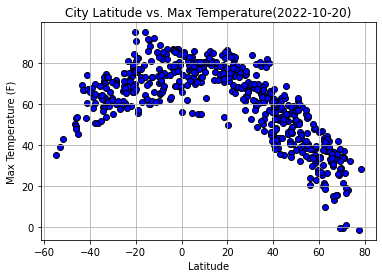

<Figure size 432x288 with 0 Axes>

In [71]:
#Converting Date for title of plot
timestamp = city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.show()

plt.savefig("../output_data/Lat_vs_temp_plot")


## Latitude vs. Humidity Plot

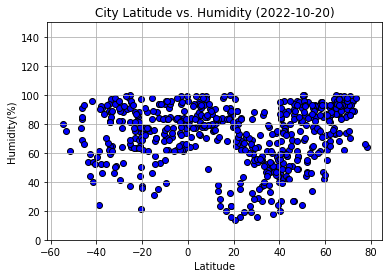

<Figure size 432x288 with 0 Axes>

In [72]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.show()

plt.savefig("../output_data/Lat_vs_humidity_plot")


## Latitude vs. Cloudiness Plot

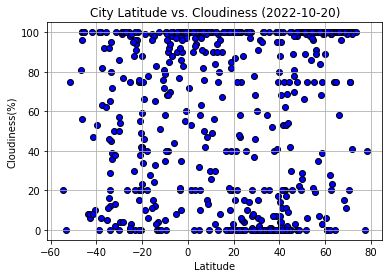

<Figure size 432x288 with 0 Axes>

In [73]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.show()

plt.savefig("../output_data/Lat_vs_cloudiness_plot")


## Latitude vs. Wind Speed Plot

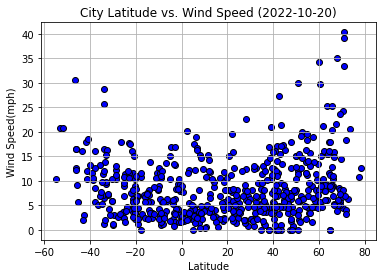

<Figure size 432x288 with 0 Axes>

In [74]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.show()

plt.savefig("../output_data/Lat_vs_windSpeed_plot")


## Linear Regression

In [75]:
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [76]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Lat"]>0]
Southern_hemisphere = city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8702900831859727


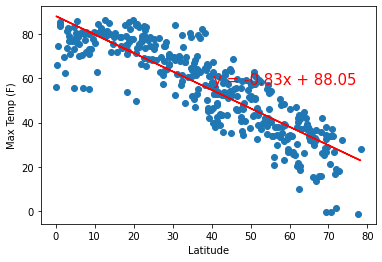

None


In [77]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6492266140038752


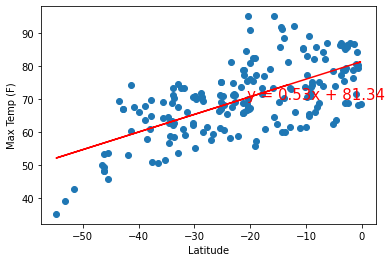

None


In [46]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14116072165743665


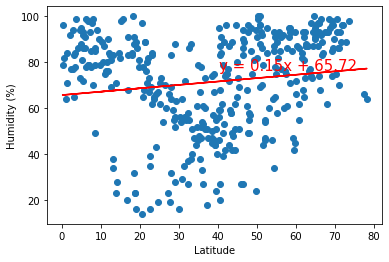

None


In [47]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10531059255669216


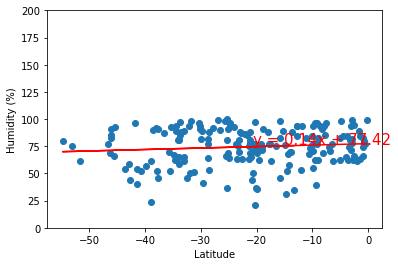

None


In [48]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19125210388136488


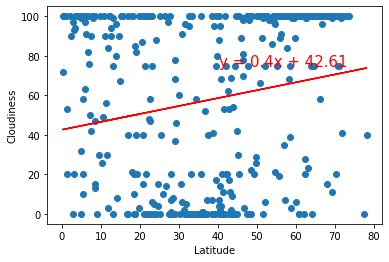

None


In [49]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18330064691586395


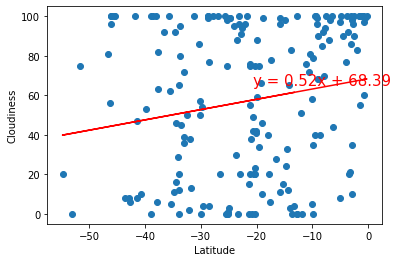

None


In [50]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.32184179578596495


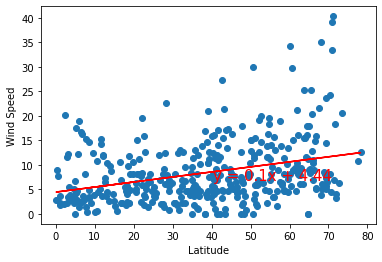

None


In [51]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.36576935228171026


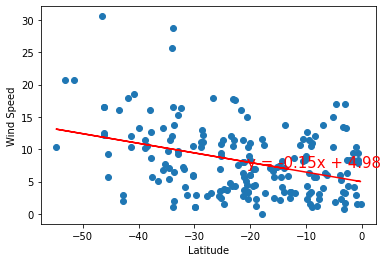

None


In [52]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))